### Dimension reduction

Dimension reduction finds patterns in data, and uses these patterns to re-express it in a compressed form. This makes subsequent computation with the data much more efficient, and this can be a big deal in a world of big datasets. 

However, the most important function of dimension reduction is to reduce a dataset to its "bare bones", discarding noisy features that cause big problems for supervised learning tasks like regression and classification. In many real-world applications, it's dimension reduction that makes prediction possible.

#### Principal Component Analysis

In this chapter, you'll learn about the most fundamental of dimension reduction techniques. It's called "Principal Component Analysis", or "PCA" for short. PCA performs dimension reduction in two steps. The first one, called "de-correlation", doesn't change the dimension of the data at all. the second one, dimension reduction


First we'll focus on the first step.

#### PCA aligns data with axes

In this first step, PCA rotates the samples so that they are aligned with the coordinate axes. In fact, it does more than this: PCA also shifts the samples so that they have mean zero. In PCA no information is lost - this is true no matter how many features your dataset has.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
grains = pd.read_csv("seeds-width-vs-length.csv", header=None)
grains = grains.rename(columns={0: 'width', 1: 'length'})
grains.head()

,width,length
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [12]:
grains.shape

(210, 2)

#### Correlated data in nature

You are given a dataset grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

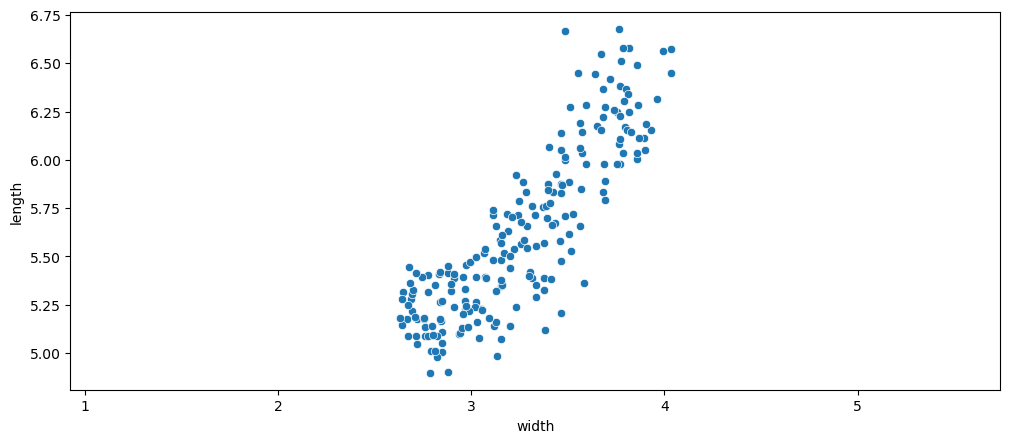

In [14]:
# Scatter plot width vs length
plt.figure(figsize = (12,5), dpi= 100)
sns.scatterplot(x='width', y='length',data=grains)
plt.axis('equal')
plt.show()

#### Pearson correlation

Linear correlation can be measured with the Pearson correlation. It takes values between -1 and 1, where larger values indicate a stronger correlation, and 0 indicates no linear correlation. 

In [16]:
from scipy.stats import pearsonr

In [18]:
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(grains["width"], grains["length"])

# Display the correlation
print(correlation)

0.8604149377143464


As we expected, the width and length of the grain samples are highly correlated.

#### Decorrelating the grain measurements with PCA

We observed that the width and length measurements of the grains are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

####  Using scikit-learn PCA

Let's see PCA in action on the some features of the grains dataset. Firstly, import PCA. Create a PCA object.

In [19]:
# Import PCA
from sklearn.decomposition import PCA

In [20]:
# Create PCA instance: model
model = PCA()


#### PCA follows the fit/transform pattern

Scikit-learn has an implementation of PCA, and it has fit and transform methods just like StandardScaler. 

The fit method learns how to shift and how to rotate the samples, but doesn't actually change them. 

The transform method, on the other hand, applies the transformation that fit learned. In particular, the transform method can be applied to new, unseen samples.

Now fit the PCA object to the grains dataset. Then use the fit PCA object to transform the samples. This returns a new array of transformed samples.

In [21]:
# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)


In [25]:
#pca_features

#### PCA features

This new array has the same number of rows and columns as the original sample array. In particular, there is one row for each transformed sample. The columns of the new array correspond to "PCA features", just as the original features corresponded to columns of the original array.

#### PCA features are not correlated

It is often the case that the features of a dataset are correlated. However, PCA, due to the rotation it performs, "de-correlates" the data, in the sense that the columns of the transformed array are not linearly correlated.

#### Principal components

Finally, PCA is called "principal component analysis" because it learns the "principal components" of the data. These are the directions in which the samples vary the most.

After a PCA model has been fit, the principal components are available as the components attribute. 

In [26]:
model.components_

array([[ 0.63910027,  0.76912343],
       [-0.76912343,  0.63910027]])

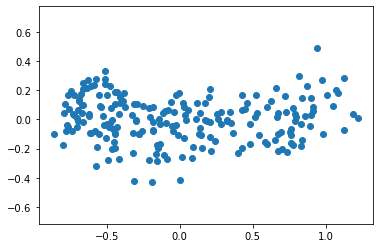

In [22]:
# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [23]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

-3.469446951953614e-18


Now, we've successfully decorrelated the grain measurements with PCA!

#### The first principal component

The first principal component of the data is the direction in which the data varies the most. We'll use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

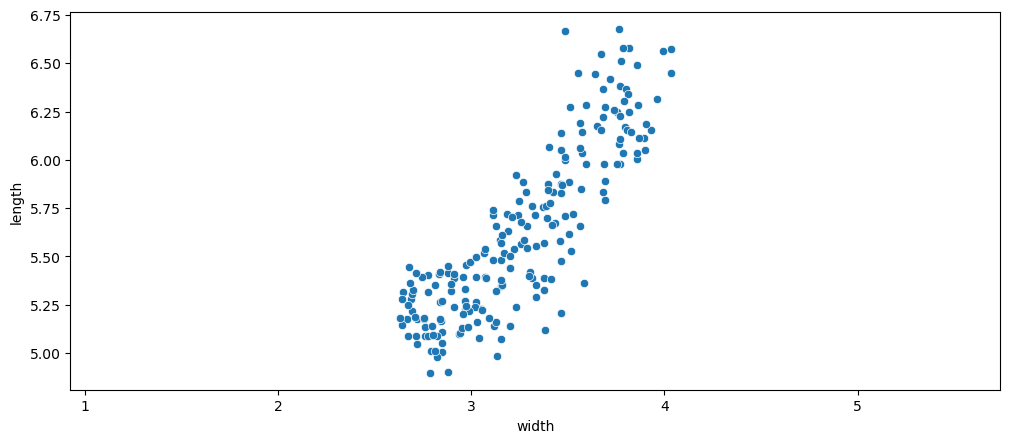

In [28]:
# Make a scatter plot of the untransformed points
# Scatter plot width vs length
plt.figure(figsize = (12,5), dpi= 100)
sns.scatterplot(x='width', y='length',data=grains)
plt.axis('equal')
plt.show()

In [29]:
# Get the mean of the grain samples: mean
mean = model.mean_

In [35]:
mean

array([3.25860476, 5.62853333])

In [30]:
# Get the first principal component: first_pc
first_pc = model.components_[0,:]

In [31]:
first_pc

array([0.63910027, 0.76912343])

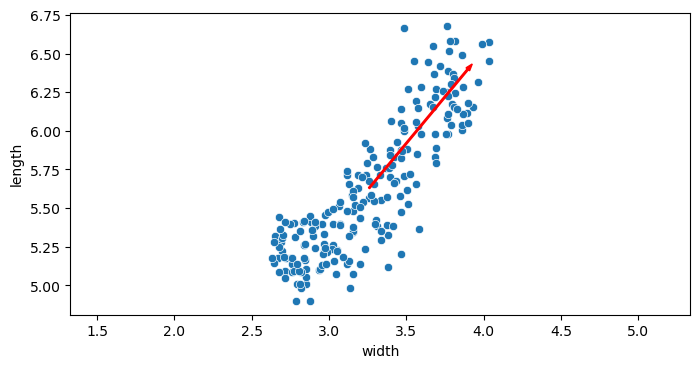

In [37]:
# Plot first_pc as an arrow, starting at mean
plt.figure(figsize = (8,4), dpi= 100)
sns.scatterplot(x='width', y='length',data=grains)
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
# Keep axes on same scale
plt.axis('equal')
plt.show()

In [34]:
# Get the second principal component: first_pc
second_pc = model.components_[1,:]
second_pc

array([-0.76912343,  0.63910027])

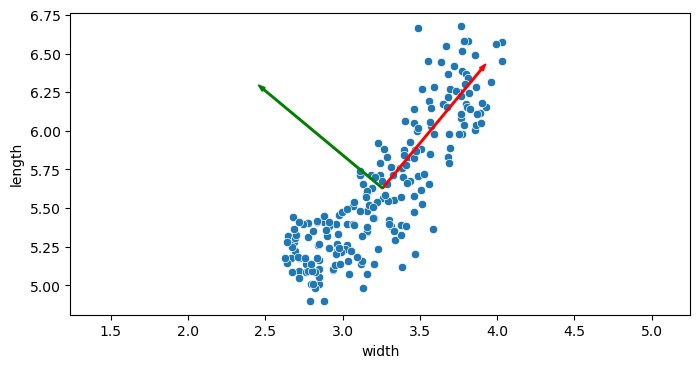

In [38]:
# Plot first_pc and second_pc as arrows, starting at mean
plt.figure(figsize = (8,4), dpi= 100)
sns.scatterplot(x='width', y='length',data=grains)
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)
# Keep axes on same scale
plt.axis('equal')
plt.show()